<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/B8_Clustering_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Walkthrough
===
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [21]:
data = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/Mall_Customers.csv")

In [22]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

### How many rows/columns are there?

In [23]:
data.shape

(200, 5)

### How many customers are there?

In [24]:
data['CustomerID'].nunique()

200

This means, we have 200 unique customer IDs

### How many of each gender type are there?

In [25]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

This means, there are more female than male in our dataset.

### How does the annual income distribution of our customers look like?

Descriptive Statistics

In [26]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

<ipython-input-27-07fb0797a5c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'], kde=False)


<Axes: xlabel='Annual Income (k$)'>

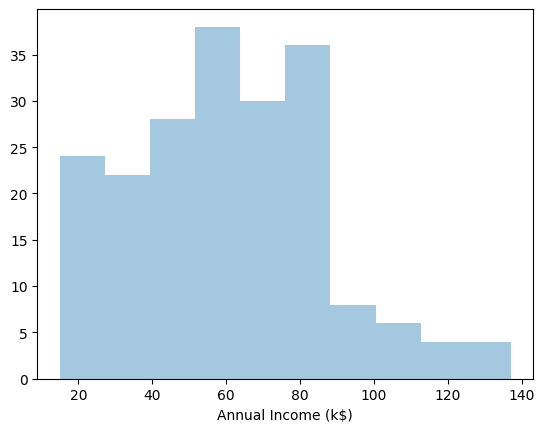

In [27]:
sns.distplot(data['Annual Income (k$)'], kde=False)

### How does the spending score distribution look like?

In [28]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<ipython-input-29-01121c3d3a04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'], kde=False)


<Axes: xlabel='Spending Score (1-100)'>

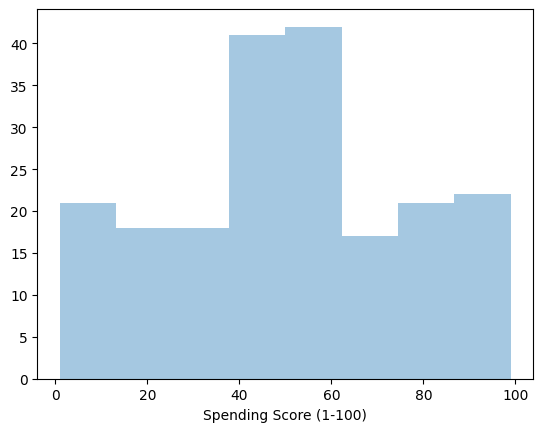

In [29]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

Spend score is pretty much normally distributed.

# K-means Clustering

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [30]:
from sklearn.cluster import KMeans

In [31]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

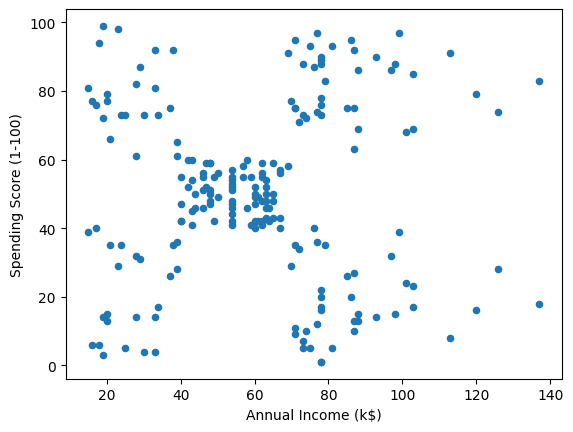

In [32]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

In [33]:
# Get features we need
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
X_raw = data[features]

# Convert categorical to numeric
X = pd.get_dummies(X_raw)
X_raw.head()

X.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

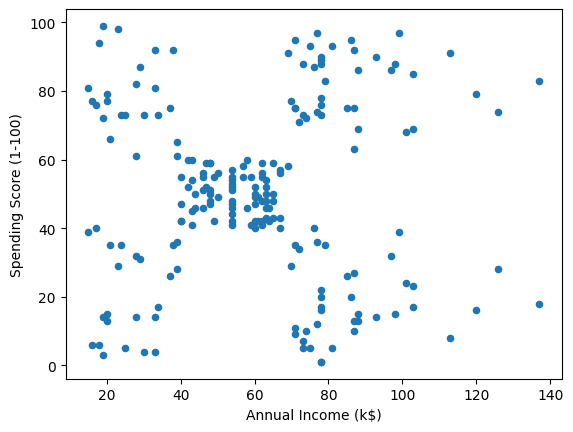

In [34]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('Annual Income (k$)', 'Spending Score (1-100)')

### Choosing Optimal *k*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

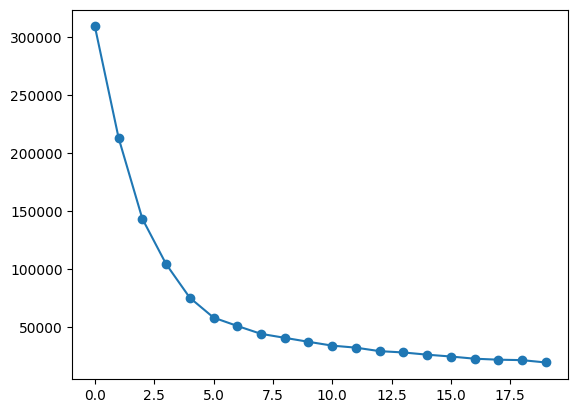

In [35]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=6*.

In [36]:
# Clustering using KMeans. We choose 6 clusters
km = KMeans(n_clusters=6, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),Age,labels
0,15,39,19,0
1,15,81,21,3
2,16,6,20,0
3,16,77,23,3
4,17,40,31,0


### Plot Centers and labels

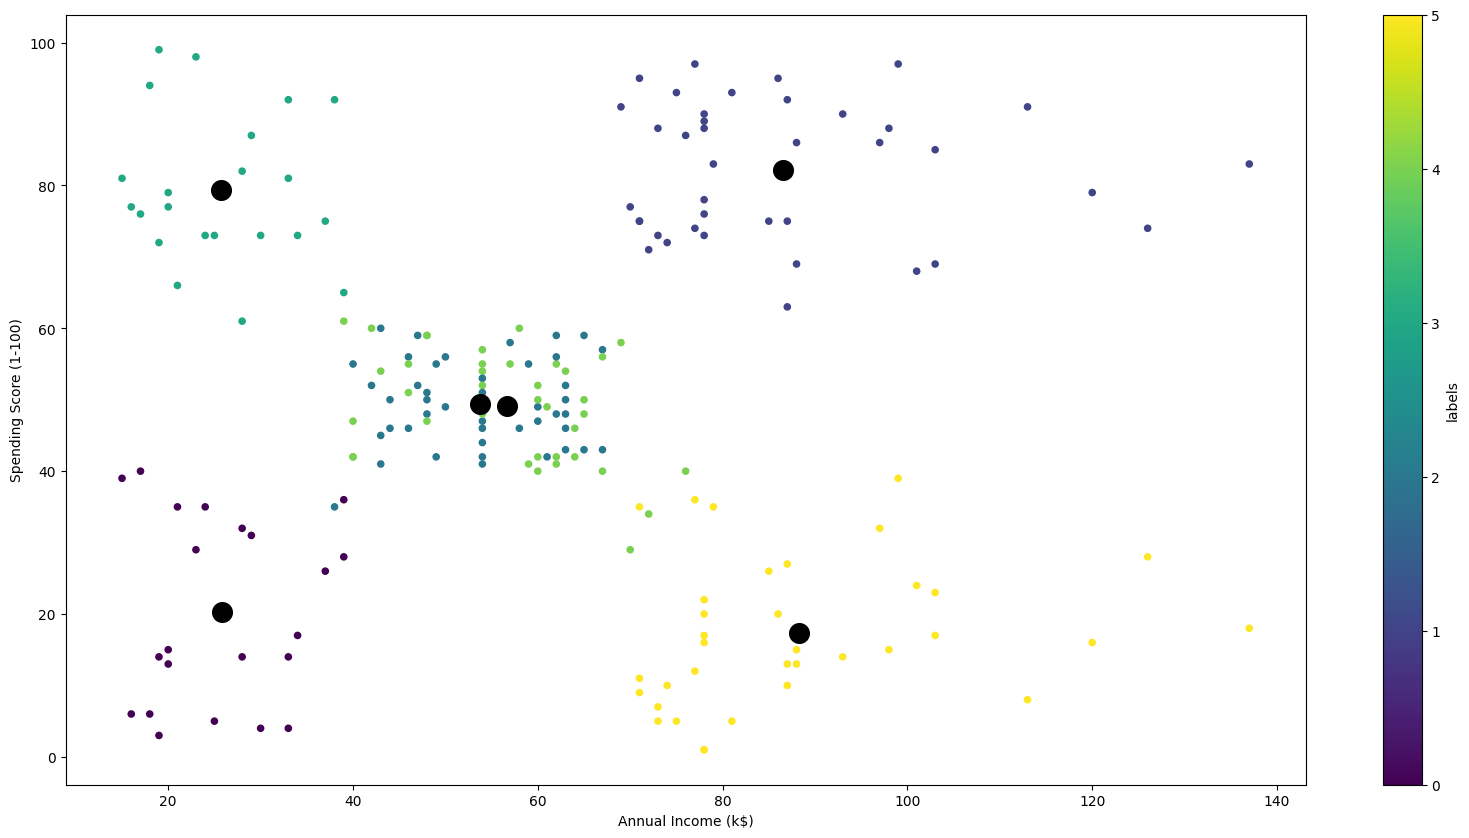

In [38]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)',
                      y='Spending Score (1-100)',
                      c='labels',
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [39]:
new_data['labels'].value_counts()

2    44
1    39
4    38
5    35
0    22
3    22
Name: labels, dtype: int64

In [40]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,22.000000,22.000000,22.000000,22.0
mean,25.772727,20.272727,44.318182,0.0
std,7.646548,12.947446,12.800247,0.0
min,15.000000,3.000000,19.000000,0.0
25%,19.250000,7.750000,35.250000,0.0
50%,24.500000,16.000000,45.500000,0.0
75%,32.250000,31.750000,52.750000,0.0
max,39.000000,40.000000,67.000000,0.0


Cluster 0: low Income & low Spend & High Age

In [41]:
# Cluster 1
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,39.000000,39.000000,39.000000,39.0
mean,86.538462,82.128205,32.692308,1.0
std,16.312485,9.364489,3.728650,0.0
min,69.000000,63.000000,27.000000,1.0
25%,75.500000,74.500000,30.000000,1.0
50%,79.000000,83.000000,32.000000,1.0
75%,95.000000,90.000000,35.500000,1.0
max,137.000000,97.000000,40.000000,1.0


Cluster 1: High Income & High Spend & Middle Age

In [42]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,44.000000,44.000000,44.000000,44.0
mean,53.704545,49.386364,56.340909,2.0
std,8.239382,5.993081,8.550651,0.0
min,38.000000,35.000000,43.000000,2.0
25%,47.000000,45.750000,49.000000,2.0
50%,54.000000,49.000000,54.000000,2.0
75%,62.000000,55.000000,65.250000,2.0
max,67.000000,60.000000,70.000000,2.0


Cluster 2: Mid Income & Mid Spend & Old Age

In [43]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,22.000000,22.000000,22.000000,22.0
mean,25.727273,79.363636,25.272727,3.0
std,7.566731,10.504174,5.257030,0.0
min,15.000000,61.000000,18.000000,3.0
25%,19.250000,73.000000,21.250000,3.0
50%,24.500000,77.000000,23.500000,3.0
75%,32.250000,85.750000,29.750000,3.0
max,39.000000,99.000000,35.000000,3.0


Cluster 3: Low Income & High Spend & Low Age

In [44]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,38.000000,38.000000,38.000000,38.0
mean,56.657895,49.131579,27.000000,4.0
std,9.905708,7.853975,7.032742,0.0
min,39.000000,29.000000,18.000000,4.0
25%,48.000000,42.000000,21.000000,4.0
50%,59.500000,50.000000,26.500000,4.0
75%,63.750000,55.000000,31.750000,4.0
max,76.000000,61.000000,40.000000,4.0


Cluster 4: Mid Income & Mid Spend & Middle Age

In [45]:
# Cluster 5
cluster_5 = new_data[new_data['labels']==5]
cluster_5.describe()

,Annual Income (k$),Spending Score (1-100),Age,labels
count,35.000000,35.000000,35.000000,35.0
mean,88.228571,17.285714,41.685714,5.0
std,16.367266,10.211215,10.897305,0.0
min,71.000000,1.000000,19.000000,5.0
25%,77.500000,10.000000,35.000000,5.0
50%,85.000000,16.000000,43.000000,5.0
75%,97.500000,23.500000,47.500000,5.0
max,137.000000,39.000000,59.000000,5.0


Cluster 5: High Income & Low Spend & High Age